# **Healthcare Cardiovascular Disease (CVD) Project:**

![](https://cdnl.iconscout.com/lottie/premium/thumb/doctor-checking-up-patient-5139513-4295179.gif)

## **1. Description**

Medical Examination Dataset Summary
  This dataset includes health records of individuals, capturing key attributes for analyzing cardiovascular disease (CVD) risk and other health conditions.

### **Key Features:**


<div style="color: White; display: fill;
            border-radius: 5px;
            background-color: skyblue;
            border-color:rgb(100, 61, 207);
            font-size: 50%;
            font-family: Verdana">

<p style="padding: 7px; color: Black;">
      <ul>   <H3>📌<b>ID:</b> - Unique identifier for each patient</H3>
      <H3> <b>1- Demographics:</b> <H3>
         📌 <B>Age:</B> - Age of the patient (in Days).<br>
         📌 <b>Gender:</b> - Gender of the patient (1: Female, 2: Male).<br>
<p style="padding: 7px; color: Black;">
      <H3><b> 2- Anthropometric Data:</b> <H3>
         📌 <b>Height:</b> - Height of the patient (cm).<br>
         📌 <b>weight:</b> - Weight of the patient (kg).<br>
         📌 <b>BMI:</b> - BMI of the patient (calculated).<br>
<p style="padding: 7px; color: Black;">
      <H3> <b>3- Blood Pressure:</b> <H3>
          📌 <b>ap_hi:</b> - Systolic of the patient (ap_hi).<br>
          📌 <b>ap_lo:</b> - Diastolic of the patient (ap_lo).<br>
<p style="padding: 7px; color: Black;">
      <H3><b> 4- Health Indicators:</b> <H3>
          📌 <b>cholesterol:</b> - Cholesterol of the patient (1: Low, 2: Medium, 3: High).<br>
          📌 <b>gluc:</b> - glucose of the patient (1: Low, 2: Medium, 3: High).<br>
          📌 <b>smoke:</b> - smoking of the patient (0: Non-smoker, 1: Smoker).<br>
          📌 <b>alco:</b> - alcohol of the patient (0: Non-alcoholic, 1: Alcoholic).<br>
          📌 <b>active:</b> - physical activity of the patient (0: Non-active, 1: Active).<br>
<p style="padding: 7px; color: Black;">
     <H3> <b>5- Target Variable:</b> <H3>
          📌 <b>Cardio:</b> - Cardiovascular disease of the patient (1: Present, 0: Absent).<br>
<br>
    <p style = "padding: 3px; color: Black;">

### **Dataset Overview**

*1*- Size: (13*70000) Thousands of individual records.

2- Type: Mixed numeric and categorical data.

3- Challenges: Includes outliers and categorical data requiring cleaning and preprocessing.

##**2. Data Preprocessing**

### **2.1 Used liberaties**

In [ ]:
pip install dash

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
import dash
from dash import html, dcc
from plotly.subplots import make_subplots
from scipy.stats import gaussian_kde
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_regression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")


###**2.2 Read CSV file (RAW Data)**

In [ ]:
Healthcare=pd.read_csv('medical_examination.csv')
Healthcare.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [ ]:
Healthcare.tail()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0

###**2.3 Dataset Statistics**

In [ ]:
Healthcare.info()
print("Shape of Healthcare dataset---> ",Healthcare.shape)
print("Check Duplication in the dataset--->", Healthcare.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
Shape of Healthcare dataset--->  (70000, 13)
Check Duplication in the dataset---> 0


In [ ]:
Healthcare.describe()

id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349843    164.359229     74.205690   
std    28851.302323   2467.251667      0.477253      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      3.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250      0.572270      0.283484   
min     -150.000000    -70.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max    16020.000000  11000.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  70000.000000  70000.000000  70000.000000  
mean       0.053771      0.803729      0.499700  
std        0.225568      0.397179      0.500003  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

### **2.4 Data Handling:**




####**2.4.1 Converting Human age from days to years**

In [ ]:
Healthcare_Cleaned=Healthcare.copy()
Healthcare_Cleaned['age']=Healthcare_Cleaned['age']/365
Healthcare_Cleaned['age']=Healthcare_Cleaned['age'].astype('int64')
Healthcare_Cleaned

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   50       2     168    62.0    110     80            1     1   
1          1   55       1     156    85.0    140     90            3     1   
2          2   51       1     165    64.0    130     70            3     1   
3          3   48       2     169    82.0    150    100            1     1   
4          4   47       1     156    56.0    100     60            1     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993   52       2     168    76.0    120     80            1     1   
69996  99995   61       1     158   126.0    140     90            2     2   
69997  99996   52       2     183   105.0    180     90            3     1   
69998  99998   61       1     163    72.0    135     80            1     2   
69999  99999   56       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[70000 rows x 13 columns]

In [ ]:
Healthcare_Cleaned.describe()

id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900     52.840671      1.349843    164.359229     74.205690   
std    28851.302323      6.766774      0.477253      8.210126     14.395757   
min        0.000000     29.000000      1.000000     55.000000     10.000000   
25%    25006.750000     48.000000      1.000000    159.000000     65.000000   
50%    50001.500000     53.000000      1.000000    165.000000     72.000000   
75%    74889.250000     58.000000      2.000000    170.000000     82.000000   
max    99999.000000     64.000000      3.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250      0.572270      0.283484   
min     -150.000000    -70.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max    16020.000000  11000.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  70000.000000  70000.000000  70000.000000  
mean       0.053771      0.803729      0.499700  
std        0.225568      0.397179      0.500003  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

**Show the data distribution**

In [ ]:

colors = ["blue", "lightcoral", "lightgreen","yellow", "#7B68EE","blue", "lightcoral", "lightgreen","yellow", "#7B68EE","blue"]

columns = ['age','gender', 'height', 'weight', 'ap_hi', 'ap_lo','cholesterol','gluc','smoke','alco','active']

fig = make_subplots(rows=4, cols=3, subplot_titles=[f'Distribution of {col}' for col in columns])

# Loop through columns and plot histograms with different colors
for i, column in enumerate(columns):
    row = (i // 3) + 1
    col = (i % 3) + 1
    fig.add_trace(
        go.Histogram(
            x=Healthcare_Cleaned[column],
            nbinsx=30,
            marker=dict(
                color=colors[i],  # Fill color
                line=dict(color='black', width=2)  # Edge color and width
            ),
            name=column
        ),
        row=row, col=col
    )
    fig.update_xaxes(title_text=column, row=row, col=col)
    fig.update_yaxes(title_text="Count", row=row, col=col)



fig.update_layout(showlegend=False,
    title_text="Feature Distributions",
    title_font_size=20,
    width=1200,  # Increase figure width
    height=1000,  # Increase figure height
    margin=dict(t=50, b=50, l=50, r=50) ) # Adjust margins


fig.update_layout(title_text="Feature Distributions", title_font_size=16)


fig.show()

####**2.4.2 Drop unlogical values from gender column**

In [ ]:
distinct_values = Healthcare_Cleaned['gender'].value_counts()
print(distinct_values)

Healthcare_Cleaned=Healthcare_Cleaned[Healthcare_Cleaned['gender']!=3]
distinct_values_AfterHandling = Healthcare_Cleaned['gender'].value_counts()
print(distinct_values_AfterHandling)

gender
1    45522
2    24467
3       11
Name: count, dtype: int64
gender
1    45522
2    24467
Name: count, dtype: int64


<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b>From the above histogram: Age distribution is a left skewed and needs normalization</b>
</div>



In [ ]:

# Define unique colors for each box plot
colors = ["blue", "lightcoral", "lightgreen","yellow", "#7B68EE"]

# List of columns to plot
columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=[f'Box Plot of {col}' for col in columns])

# Loop through columns and plot box plots
for i, column in enumerate(columns):
    row = (i // 2) + 1  # Calculate row position
    col = (i % 2) + 1   # Calculate column position
    fig.add_trace(
        go.Box(
            y=Healthcare_Cleaned[column],
            name=column,
            marker_color=colors[i]  # Set box color
        ),
        row=row, col=col
    )

# Hide unused subplots if they exist
for j in range(len(columns), 6):  # 6 subplots in a 3x2 grid
    fig.update_traces(visible=False, row=(j // 2) + 1, col=(j % 2) + 1)

# Update layout
fig.update_layout(
    title="Box Plots of Features",
    title_font_size=20,
    showlegend=False,
    height=800,
    width=1000
)

# Show the final figure
fig.show()

####**2.4.3 Handling the height column**

<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b> condition used neglect samples which height lower than 100 or greater than 200 (Search from Wikipedia)</b>
</div>



In [ ]:
FilteredHeight= ((Healthcare_Cleaned['height']>200) | (Healthcare_Cleaned['height']<100)).sum()
FilteredHeight

np.int64(31)

In [ ]:
Healthcare_Cleaned = Healthcare_Cleaned.drop(Healthcare_Cleaned[(Healthcare_Cleaned['height'] > 200) | (Healthcare_Cleaned['height'] < 100)].index)


In [ ]:
Healthcare_Cleaned

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   50       2     168    62.0    110     80            1     1   
1          1   55       1     156    85.0    140     90            3     1   
2          2   51       1     165    64.0    130     70            3     1   
3          3   48       2     169    82.0    150    100            1     1   
4          4   47       1     156    56.0    100     60            1     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993   52       2     168    76.0    120     80            1     1   
69996  99995   61       1     158   126.0    140     90            2     2   
69997  99996   52       2     183   105.0    180     90            3     1   
69998  99998   61       1     163    72.0    135     80            1     2   
69999  99999   56       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[69958 rows x 13 columns]

####**2.4.4 Handling the weight column**

<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b>Condition: neglecting humans whose weight is greater than 190 or less than 45</b>
</div>



In [ ]:
FilteredWeight= ((Healthcare_Cleaned['weight']>190) | (Healthcare_Cleaned['weight']<45)).sum()
FilteredWeight

np.int64(304)

In [ ]:
Healthcare_Cleaned = Healthcare_Cleaned.drop(Healthcare_Cleaned[(Healthcare_Cleaned['weight'] > 190) | (Healthcare_Cleaned['weight'] < 45)].index)

In [ ]:
Healthcare_Cleaned

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   50       2     168    62.0    110     80            1     1   
1          1   55       1     156    85.0    140     90            3     1   
2          2   51       1     165    64.0    130     70            3     1   
3          3   48       2     169    82.0    150    100            1     1   
4          4   47       1     156    56.0    100     60            1     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993   52       2     168    76.0    120     80            1     1   
69996  99995   61       1     158   126.0    140     90            2     2   
69997  99996   52       2     183   105.0    180     90            3     1   
69998  99998   61       1     163    72.0    135     80            1     2   
69999  99999   56       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[69654 rows x 13 columns]

In [ ]:
Healthcare_Cleaned.describe()

id           age        gender        height        weight  \
count  69654.000000  69654.000000  69654.000000  69654.000000  69654.000000   
mean   49958.038849     52.845321      1.350805    164.445502     74.344762   
std    28854.556667      6.762313      0.477226      7.952530     14.222838   
min        0.000000     29.000000      1.000000    100.000000     45.000000   
25%    24989.250000     48.000000      1.000000    159.000000     65.000000   
50%    49987.500000     53.000000      1.000000    165.000000     72.000000   
75%    74880.750000     58.000000      2.000000    170.000000     82.000000   
max    99999.000000     64.000000      2.000000    200.000000    183.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  69654.000000  69654.000000  69654.000000  69654.000000  69654.000000   
mean     128.865133     96.698940      1.367373      1.226864      0.088365   
std      154.334330    188.831336      0.680704      0.572724      0.283828   
min     -150.000000    -70.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max    16020.000000  11000.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  69654.000000  69654.000000  69654.000000  
mean       0.053881      0.803515      0.500747  
std        0.225784      0.397343      0.500003  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      1.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

####**2.4.5 Handling ap_hi column**

<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b>Condition: the lowest possible value of ap_hi from the below table we found that its value equals to 50 mmHg</b>
</div>



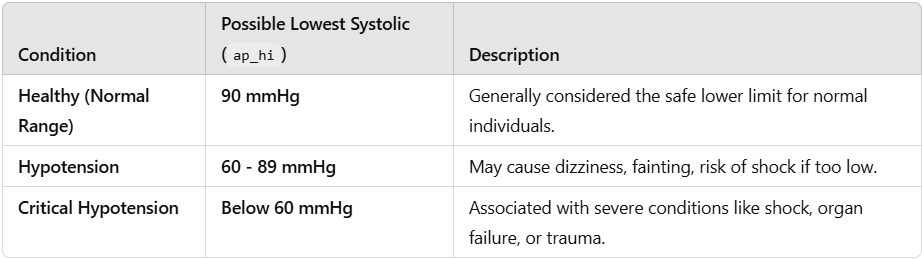

<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b>Condition: the highest possible vaue of ap_hi from the below table we will take the upper threshold -->250 mmHg</b>
</div>



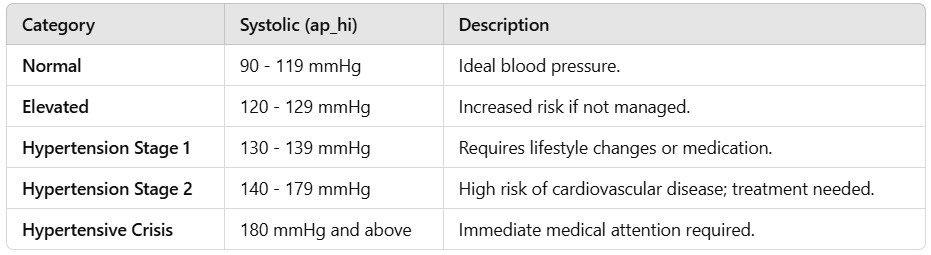

<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b>These thresholds are chosen based on search taking into consideration (Age[29,64],Weight[45,183], height[100,200])</b>
</div>



In [ ]:
Filtered_ap_hi= ((Healthcare_Cleaned['ap_hi']>250) | (Healthcare_Cleaned['ap_hi']<50)).sum()
Filtered_ap_hi

np.int64(224)

In [ ]:
Healthcare_Cleaned = Healthcare_Cleaned.drop(Healthcare_Cleaned[(Healthcare_Cleaned['ap_hi'] > 250) | (Healthcare_Cleaned['ap_hi'] < 50)].index)

In [ ]:
Healthcare_Cleaned

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   50       2     168    62.0    110     80            1     1   
1          1   55       1     156    85.0    140     90            3     1   
2          2   51       1     165    64.0    130     70            3     1   
3          3   48       2     169    82.0    150    100            1     1   
4          4   47       1     156    56.0    100     60            1     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993   52       2     168    76.0    120     80            1     1   
69996  99995   61       1     158   126.0    140     90            2     2   
69997  99996   52       2     183   105.0    180     90            3     1   
69998  99998   61       1     163    72.0    135     80            1     2   
69999  99999   56       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[69430 rows x 13 columns]

####**2.4.6 Handling ap_lo column**

<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b>Condition: the upper and lower thresholds of ap_lo. Let's take the upper threshold--> 150 mm Hg and the lowr threshold-->40 mm Hg</b>
</div>



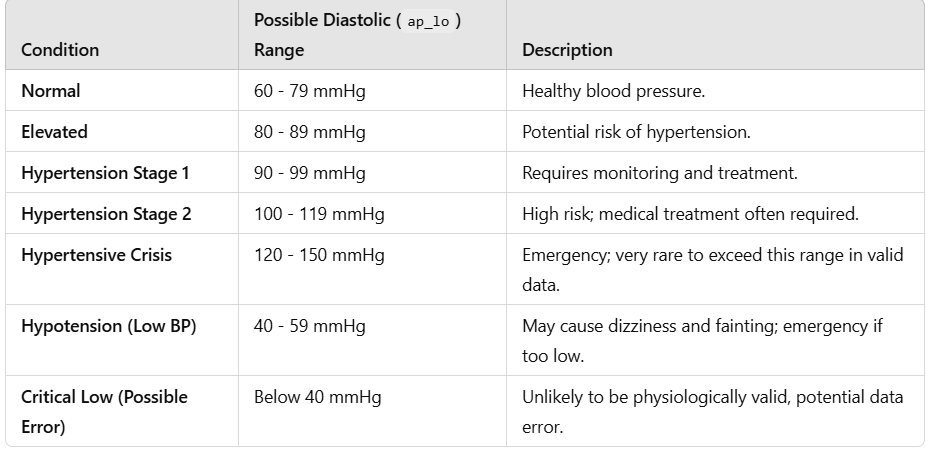

In [ ]:
Filtered_ap_lo= ((Healthcare_Cleaned['ap_lo']>150) | (Healthcare_Cleaned['ap_lo']<40)).sum()
Filtered_ap_lo

np.int64(1013)

In [ ]:
(Healthcare_Cleaned[((Healthcare_Cleaned['ap_lo']>150) | (Healthcare_Cleaned['ap_lo']<40)) & (Healthcare_Cleaned['cardio']==1)])

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
228      314   47       2     183    98.0    160   1100            1     2   
241      334   60       2     157    60.0    160   1000            2     1   
260      357   49       1     150    83.0    140    800            1     1   
329      458   64       1     176    63.0    160   1000            2     2   
345      482   51       1     154    81.0    140   1000            2     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69631  99454   40       1     154    90.0    130   1000            2     2   
69771  99659   63       1     167    81.0    160   1000            1     1   
69872  99798   59       1     152    56.0    160   1000            1     1   
69878  99807   58       2     168    95.0    160   1000            1     1   
69967  99955   58       2     168    63.0    140   1000            1     1   

       smoke  alco  active  cardio  
228        1     0       1       1  
241        0     0       0       1  
260        0     0       1       1  
329        0     0       0       1  
345        0     0       1       1  
...      ...   ...     ...     ...  
69631      0     0       1       1  
69771      0     0       1       1  
69872      0     0       1       1  
69878      0     0       1       1  
69967      0     0       1       1  

[837 rows x 13 columns]

<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b> The number of samples in which ap_lo>150 & ap_lo<40 & cardio=1 is 837 samples. </b>
</div>



**Used Criteria**

We assumed that people whose ap_lo>150 and ap_lo<40 should be patients so cardio flag='1' But we wanted to impute ap_lo with logic values so we have determined mean and median of dataframe with conditions
(Healthcare_Cleaned['ap_lo']<150) & (Healthcare_Cleaned['ap_lo']>40) & (Healthcare_Cleaned['cardio']==1) this is the normal case.

In [ ]:
#Filter Healthcare_Cleaned with condition cardio==1:
Healthcare_Cleaned_Cardio1=Healthcare_Cleaned[(Healthcare_Cleaned['ap_lo']<150) & (Healthcare_Cleaned['ap_lo']>40) & (Healthcare_Cleaned['cardio']==1)]
Healthcare_Cleaned_Cardio1.describe()


id           age        gender        height        weight  \
count  33908.000000  33908.000000  33908.000000  33908.000000  33908.000000   
mean   50081.886222     54.462133      1.352955    164.323906     76.795529   
std    28824.229845      6.354043      0.477896      8.057985     14.746116   
min        1.000000     39.000000      1.000000    100.000000     45.000000   
25%    25261.250000     50.000000      1.000000    159.000000     66.000000   
50%    50135.500000     55.000000      1.000000    165.000000     75.000000   
75%    74996.500000     60.000000      2.000000    170.000000     85.000000   
max    99998.000000     64.000000      2.000000    198.000000    183.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  33908.000000  33908.000000  33908.000000  33908.000000  33908.000000   
mean     133.828595     84.619441      1.516722      1.278076      0.083520   
std       17.343563      9.630103      0.776675      0.625285      0.276671   
min       70.000000     45.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      130.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max      240.000000    140.000000      3.000000      3.000000      1.000000   

               alco        active   cardio  
count  33908.000000  33908.000000  33908.0  
mean       0.051699      0.788192      1.0  
std        0.221421      0.408596      0.0  
min        0.000000      0.000000      1.0  
25%        0.000000      1.000000      1.0  
50%        0.000000      1.000000      1.0  
75%        0.000000      1.000000      1.0  
max        1.000000      1.000000      1.0

In [ ]:


# Assuming Healthcare_Cleaned_Cardio1 is your DataFrame
# Healthcare_Cleaned_Cardio1 = pd.read_csv('your_data.csv')  # Example of loading data

# Calculate mean and median
mean_value = Healthcare_Cleaned_Cardio1['ap_lo'].mean()
median_value = Healthcare_Cleaned_Cardio1['ap_lo'].median()

# Create histogram with KDE
fig = go.Figure()

# Add histogram
fig.add_trace(
    go.Histogram(
        x=Healthcare_Cleaned_Cardio1['ap_lo'],
        nbinsx=30,  # Number of bins
        marker_color='skyblue',  # Histogram color
        name='Histogram',
        opacity=0.75,
        histnorm='probability density'  # Normalize for density
    )
)

# Compute KDE
kde = gaussian_kde(Healthcare_Cleaned_Cardio1['ap_lo'].dropna())
x_range = np.linspace(Healthcare_Cleaned_Cardio1['ap_lo'].min(), Healthcare_Cleaned_Cardio1['ap_lo'].max(), 1000)
y_kde = kde(x_range)

# Add KDE as a line plot
fig.add_trace(
    go.Scatter(
        x=x_range,
        y=y_kde,
        mode='lines',
        line=dict(color='orange', width=2),
        name='KDE'
    )
)

# Add mean line
fig.add_trace(
    go.Scatter(
        x=[mean_value, mean_value],
        y=[0, max(y_kde)],  # Adjust y-range to match KDE height
        mode='lines',
        line=dict(color='red', dash='dash'),
        name='Mean'
    )
)

# Add median line
fig.add_trace(
    go.Scatter(
        x=[median_value, median_value],
        y=[0, max(y_kde)],  # Adjust y-range to match KDE height
        mode='lines',
        line=dict(color='green', dash='dash'),
        name='Median'
    )
)

# Update layout
fig.update_layout(
    title='Distribution of ap_lo',
    title_font_size=20,
    xaxis_title='ap_lo',
    yaxis_title='Density',
    legend_title='Legend',
    showlegend=True,
    template='plotly_white'
)

# Show the figure
fig.show()

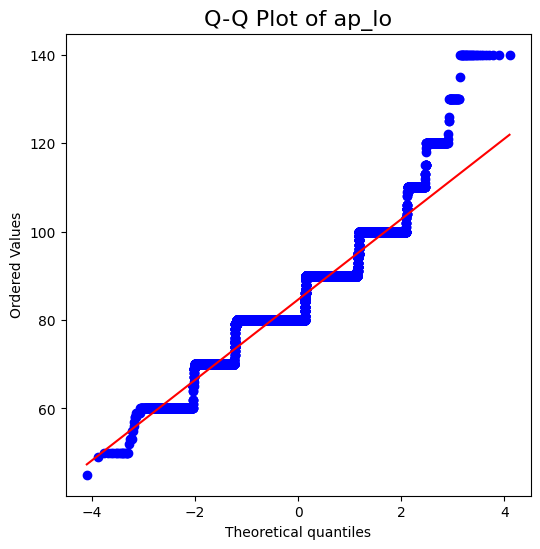

In [ ]:
 #Q-Q plot to check for normality
plt.figure(figsize=(6, 6))
stats.probplot(Healthcare_Cleaned_Cardio1['ap_lo'].dropna(), dist="norm", plot=plt)
plt.title(f'Q-Q Plot of {column}', fontsize=16)
plt.show()

In [ ]:
#Get the values of mean and median:
print("Mean vaue of ap_lo: ",Healthcare_Cleaned_Cardio1['ap_lo'].mean())
print("Median vaue of ap_lo: ",Healthcare_Cleaned_Cardio1['ap_lo'].median())

Mean vaue of ap_lo:  84.61944083991979
Median vaue of ap_lo:  80.0


<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b>Samples in Healthcare_Cleaned which ap_lo>150 & ap_hi<40 & cardio=1 impute the value of ap_lo with the mean value.</b>
</div>



In [ ]:
mean_ap_lo = int(Healthcare_Cleaned_Cardio1['ap_lo'].mean())

# Apply the imputation based on the specified conditions
Healthcare_Cleaned.loc[((Healthcare_Cleaned['ap_lo'] > 150) | (Healthcare_Cleaned['ap_lo'] < 40)) & (Healthcare_Cleaned['cardio'] == 1),'ap_lo'] = mean_ap_lo


In [ ]:
Healthcare_Cleaned

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   50       2     168    62.0    110     80            1     1   
1          1   55       1     156    85.0    140     90            3     1   
2          2   51       1     165    64.0    130     70            3     1   
3          3   48       2     169    82.0    150    100            1     1   
4          4   47       1     156    56.0    100     60            1     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993   52       2     168    76.0    120     80            1     1   
69996  99995   61       1     158   126.0    140     90            2     2   
69997  99996   52       2     183   105.0    180     90            3     1   
69998  99998   61       1     163    72.0    135     80            1     2   
69999  99999   56       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[69430 rows x 13 columns]

In [ ]:
# Verify the changes in the DataFrame
print(Healthcare_Cleaned[((Healthcare_Cleaned['ap_lo'] > 150) | (Healthcare_Cleaned['ap_hi'] < 40))& (Healthcare_Cleaned['cardio'] == 1)])

Empty DataFrame
Columns: [id, age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio]
Index: []


In [ ]:
#(Healthcare_Cleaned[((Healthcare_Cleaned['ap_lo']>150) | (Healthcare_Cleaned['ap_lo']<40)) & (Healthcare_Cleaned['cardio']==0)])
Healthcare_Cleaned[((Healthcare_Cleaned['ap_lo'] > 150) | (Healthcare_Cleaned['ap_lo'] < 40)) & (Healthcare_Cleaned['cardio'] == 0)].count()

id             176
age            176
gender         176
height         176
weight         176
ap_hi          176
ap_lo          176
cholesterol    176
gluc           176
smoke          176
alco           176
active         176
cardio         176
dtype: int64

In [ ]:
condition=(((Healthcare_Cleaned['ap_lo'] > 150) | (Healthcare_Cleaned['ap_lo'] < 40)) & (Healthcare_Cleaned['cardio'] == 0))
Healthcare_Cleaned=Healthcare_Cleaned[~condition]
Healthcare_Cleaned

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   50       2     168    62.0    110     80            1     1   
1          1   55       1     156    85.0    140     90            3     1   
2          2   51       1     165    64.0    130     70            3     1   
3          3   48       2     169    82.0    150    100            1     1   
4          4   47       1     156    56.0    100     60            1     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993   52       2     168    76.0    120     80            1     1   
69996  99995   61       1     158   126.0    140     90            2     2   
69997  99996   52       2     183   105.0    180     90            3     1   
69998  99998   61       1     163    72.0    135     80            1     2   
69999  99999   56       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[69254 rows x 13 columns]

In [ ]:
Healthcare_Cleaned.describe()

id           age        gender        height        weight  \
count  69254.000000  69254.000000  69254.000000  69254.000000  69254.000000   
mean   49958.128368     52.846565      1.350579    164.440754     74.341584   
std    28855.901668      6.760867      0.477155      7.952150     14.223690   
min        0.000000     29.000000      1.000000    100.000000     45.000000   
25%    24983.750000     48.000000      1.000000    159.000000     65.000000   
50%    49982.000000     53.000000      1.000000    165.000000     72.000000   
75%    74878.750000     58.000000      2.000000    170.000000     82.000000   
max    99999.000000     64.000000      2.000000    200.000000    183.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  69254.000000  69254.000000  69254.000000  69254.000000  69254.000000   
mean     127.020562     81.418445      1.367589      1.226904      0.088486   
std       17.042365      9.486860      0.681026      0.572832      0.284002   
min       60.000000     40.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max      240.000000    150.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  69254.000000  69254.000000  69254.000000  
mean       0.053932      0.803578      0.501935  
std        0.225885      0.397294      0.500000  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      1.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

**During investigation in the data:
We found that PP has some negative values whcih means that ap_hi< ap_lo which is not logic.**

In [ ]:
filtered_data_Bug = Healthcare_Cleaned[Healthcare_Cleaned['ap_hi'] < Healthcare_Cleaned['ap_lo']]
filtered_data_Bug

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
474      681   52       1     156    65.0    120    150            2     1   
636      913   56       2     169    68.0     70    110            1     1   
2384    3356   64       1     154   102.0     90    150            1     1   
2990    4214   60       2     182    90.0     80    140            3     3   
3447    4880   54       2     180    80.0     80    125            3     3   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
65758  93855   39       1     165    65.0     80    120            1     1   
66657  95164   53       2     160    81.0     80    120            3     3   
67421  96271   64       1     153    74.0     80    130            1     1   
67470  96339   58       2     172    57.0     80    120            1     1   
68067  97210   50       1     152    65.0     80    120            1     1   

       smoke  alco  active  cardio  
474        0     0       1       0  
636        0     0       1       0  
2384       0     0       0       1  
2990       0     0       1       1  
3447       1     1       1       1  
...      ...   ...     ...     ...  
65758      0     0       1       0  
66657      1     1       1       1  
67421      0     0       1       1  
67470      1     0       1       1  
68067      0     0       1       0  

[88 rows x 13 columns]

As number of samples in which ap_hi < ap_low is around 88 record (0.127%) of the dataset. we decide to drop these columns.

In [ ]:
condition2=(Healthcare_Cleaned['ap_hi'] < Healthcare_Cleaned['ap_lo'])
Healthcare_Cleaned=Healthcare_Cleaned[~condition2]
Healthcare_Cleaned

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   50       2     168    62.0    110     80            1     1   
1          1   55       1     156    85.0    140     90            3     1   
2          2   51       1     165    64.0    130     70            3     1   
3          3   48       2     169    82.0    150    100            1     1   
4          4   47       1     156    56.0    100     60            1     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993   52       2     168    76.0    120     80            1     1   
69996  99995   61       1     158   126.0    140     90            2     2   
69997  99996   52       2     183   105.0    180     90            3     1   
69998  99998   61       1     163    72.0    135     80            1     2   
69999  99999   56       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[69166 rows x 13 columns]

### **2.5 Data after handling**

**Boxplots of [age,height,weight,ap_hi,ap_lo] after cleaning**

In [ ]:
colors = ["blue", "lightcoral", "lightgreen","yellow", "#7B68EE"]
columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=[f'Box Plot of {col}' for col in columns])


for i, column in enumerate(columns):
    row = (i // 2) + 1
    col = (i % 2) + 1
    fig.add_trace(
        go.Box(
            y=Healthcare_Cleaned[column],
            name=column,
            marker_color=colors[i]  # Set box color
        ),
        row=row, col=col
    )

for j in range(len(columns), 6):  # 6 subplots in a 3x2 grid
    fig.update_traces(visible=False, row=(j // 2) + 1, col=(j % 2) + 1)

# Update layout
fig.update_layout(
    title="Box Plots of Features",
    title_font_size=20,
    showlegend=False,
    height=800,
    width=1000
)

# Show the final figure
fig.show()

In [ ]:
Healthcare_Cleaned

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   50       2     168    62.0    110     80            1     1   
1          1   55       1     156    85.0    140     90            3     1   
2          2   51       1     165    64.0    130     70            3     1   
3          3   48       2     169    82.0    150    100            1     1   
4          4   47       1     156    56.0    100     60            1     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993   52       2     168    76.0    120     80            1     1   
69996  99995   61       1     158   126.0    140     90            2     2   
69997  99996   52       2     183   105.0    180     90            3     1   
69998  99998   61       1     163    72.0    135     80            1     2   
69999  99999   56       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[69166 rows x 13 columns]

### **Export Cleaned Dataset.**

In [ ]:
Healthcare_Cleaned.to_csv('Healthcare_Cleaned_Updated.csv', index=False, encoding='utf-8')
print("Updated DataFrame saved to 'Healthcare_Cleaned_Updated.csv'.")

Updated DataFrame saved to 'Healthcare_Cleaned_Updated.csv'.


## **3. EDA (Exploratory Data Analysis):**

### **3.1 Feature Engineering**

Feature engineering involves creating new columns for analysis:

####**3.1.1 BMI Calculation:**
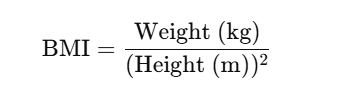

**Convert height from centimeters to meters before calculation.**

#**BMI Categories: Classify BMI values into categories:**
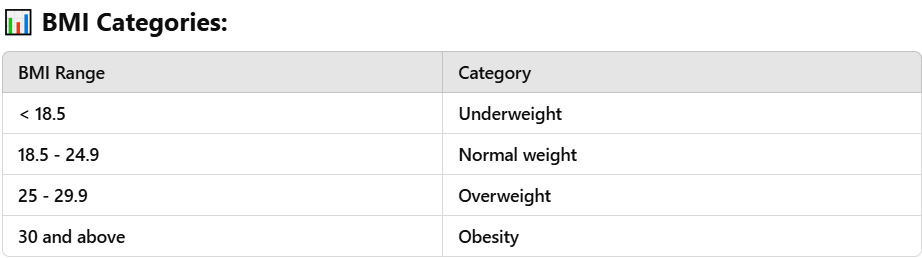



**In our data: Mapping of each category:**

1--> Under weight.

2--> Normal weight.

3--> Overweight.

4--> Obesity.

In [ ]:
# Calculate BMI
#Healthcare_Cleaned = Healthcare_Cleaned.copy()
Healthcare_Cleaned.loc[:,'height_m'] = Healthcare_Cleaned['height'] / 100  # Convert height to meters
Healthcare_Cleaned.loc[:,'bmi'] = Healthcare_Cleaned['weight'] / (Healthcare_Cleaned['height_m'] ** 2)  # Calculate BMI
Healthcare_Cleaned.drop(columns=['height_m'], inplace=True)  # Remove temporary column

# Add BMI Category
def bmi_category(bmi):
    if bmi < 18.5:
        return 1
    elif bmi < 24.9:
        return 2
    elif bmi < 29.9:
        return 3
    else:
        return 4

Healthcare_Cleaned.loc[:,'bmi_category'] = Healthcare_Cleaned['bmi'].apply(bmi_category)
Healthcare_Cleaned.head()

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0   50       2     168    62.0    110     80            1     1      0   
1   1   55       1     156    85.0    140     90            3     1      0   
2   2   51       1     165    64.0    130     70            3     1      0   
3   3   48       2     169    82.0    150    100            1     1      0   
4   4   47       1     156    56.0    100     60            1     1      0   

   alco  active  cardio        bmi  bmi_category  
0     0       1       0  21.967120             2  
1     0       1       1  34.927679             4  
2     0       0       1  23.507805             2  
3     0       1       1  28.710479             3  
4     0       0       0  23.011177             2

####**3.1.2 Hypertension Indicator: Add a flag indicating hypertension based on blood pressure thresholds.**

**Thresholds taken based on the above tables, These thresholds are classified as hypertension stage1:**

ap_hi-->130 mmHg

ap_lo-->90 mmHg

Based on this thresholds Hypertension=1

In [ ]:
# Add Hypertension Indicator
Healthcare_Cleaned.loc[:,'hypertension'] = ((Healthcare_Cleaned['ap_hi'] > 130) | (Healthcare_Cleaned['ap_lo'] > 90)).astype(int)

Healthcare_Cleaned.head()

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0   50       2     168    62.0    110     80            1     1      0   
1   1   55       1     156    85.0    140     90            3     1      0   
2   2   51       1     165    64.0    130     70            3     1      0   
3   3   48       2     169    82.0    150    100            1     1      0   
4   4   47       1     156    56.0    100     60            1     1      0   

   alco  active  cardio        bmi  bmi_category  hypertension  
0     0       1       0  21.967120             2             0  
1     0       1       1  34.927679             4             1  
2     0       0       1  23.507805             2             0  
3     0       1       1  28.710479             3             1  
4     0       0       0  23.011177             2             0

####**3.1.3 Both Pulse Pressure (PP) and Mean Arterial Pressure (MAP) are Features are related to cardiovascular**

In [ ]:
# Calculate Mean Arterial Pressure (MAP)
Healthcare_Cleaned.loc[:,'MAP'] = (Healthcare_Cleaned['ap_hi'] + 2 * Healthcare_Cleaned['ap_lo']) / 3

# Calculate Pulse Pressure (PP)
Healthcare_Cleaned.loc[:,'PP'] = Healthcare_Cleaned['ap_hi'] - Healthcare_Cleaned['ap_lo']
# Remove 'cardio' column and store it temporarily
cardio_col = Healthcare_Cleaned.pop('cardio')

# Insert it back at the last position
Healthcare_Cleaned['cardio'] = cardio_col

# Display results
Healthcare_Cleaned

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   50       2     168    62.0    110     80            1     1   
1          1   55       1     156    85.0    140     90            3     1   
2          2   51       1     165    64.0    130     70            3     1   
3          3   48       2     169    82.0    150    100            1     1   
4          4   47       1     156    56.0    100     60            1     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993   52       2     168    76.0    120     80            1     1   
69996  99995   61       1     158   126.0    140     90            2     2   
69997  99996   52       2     183   105.0    180     90            3     1   
69998  99998   61       1     163    72.0    135     80            1     2   
69999  99999   56       1     170    72.0    120     80            2     1   

       smoke  alco  active        bmi  bmi_category  hypertension         MAP  \
0          0     0       1  21.967120             2             0   90.000000   
1          0     0       1  34.927679             4             1  106.666667   
2          0     0       0  23.507805             2             0   90.000000   
3          0     0       1  28.710479             3             1  116.666667   
4          0     0       0  23.011177             2             0   73.333333   
...      ...   ...     ...        ...           ...           ...         ...   
69995      1     0       1  26.927438             3             0   93.333333   
69996      0     0       1  50.472681             4             1  106.666667   
69997      0     1       0  31.353579             4             1  120.000000   
69998      0     0       0  27.099251             3             1   98.333333   
69999      0     0       1  24.913495             3             0   93.333333   

       PP  cardio  
0      30       0  
1      50       1  
2      60       1  
3      50       1  
4      40       0  
...    ..     ...  
69995  40       0  
69996  50       1  
69997  90       1  
69998  55       1  
69999  40       0  

[69166 rows x 18 columns]

### **3.2 Data Visualization**


#### **3.2.1 Vesualize Age-Category & BMI category vs Cardio distribution percentage.**

In [ ]:
# Define the pulse pressure categories
#from 0-->30 category 1 --> very low pressure (0-30 mmHg)
#from 30-->60 category 2--> Normal/Low-Normal Pulse Pressure (30-60 mmHg)
#from 60-->90 category 3--> Moderately Elevated Pulse Pressure (60-90 mmHg)
#from 90-->120 category 4--> High Pulse Pressure (90-120 mmHg)
#from 120-->140 category 5--> Very High Pulse Pressure (120-140 mmHg)
bins = [0, 30, 60, 90, 120, 140]  # Adjust these ranges based on your criteria
labels = [1, 2, 3, 4, 5]  # Category labels

# Apply categorization
Healthcare_Cleaned['pp_category'] = pd.cut(Healthcare_Cleaned['PP'], bins=bins, labels=labels, right=False)


In [ ]:
# Define the age categories:
#from 20-29 category 1
#from 30-39 category 2
#from 40-49 category 3
#from 50-59 categroy 4
#from 60-69 category 5
#from 70-79 category 6

# Define age brackets
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
Healthcare_Cleaned['age_group'] = pd.cut(Healthcare_Cleaned['age'], bins=bins, labels=labels, right=False)
Healthcare_Cleaned


id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   50       2     168    62.0    110     80            1     1   
1          1   55       1     156    85.0    140     90            3     1   
2          2   51       1     165    64.0    130     70            3     1   
3          3   48       2     169    82.0    150    100            1     1   
4          4   47       1     156    56.0    100     60            1     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993   52       2     168    76.0    120     80            1     1   
69996  99995   61       1     158   126.0    140     90            2     2   
69997  99996   52       2     183   105.0    180     90            3     1   
69998  99998   61       1     163    72.0    135     80            1     2   
69999  99999   56       1     170    72.0    120     80            2     1   

       smoke  alco  active        bmi  bmi_category  hypertension         MAP  \
0          0     0       1  21.967120             2             0   90.000000   
1          0     0       1  34.927679             4             1  106.666667   
2          0     0       0  23.507805             2             0   90.000000   
3          0     0       1  28.710479             3             1  116.666667   
4          0     0       0  23.011177             2             0   73.333333   
...      ...   ...     ...        ...           ...           ...         ...   
69995      1     0       1  26.927438             3             0   93.333333   
69996      0     0       1  50.472681             4             1  106.666667   
69997      0     1       0  31.353579             4             1  120.000000   
69998      0     0       0  27.099251             3             1   98.333333   
69999      0     0       1  24.913495             3             0   93.333333   

       PP  cardio pp_category age_group  
0      30       0           2     50-59  
1      50       1           2     50-59  
2      60       1           3     50-59  
3      50       1           2     40-49  
4      40       0           2     40-49  
...    ..     ...         ...       ...  
69995  40       0           2     50-59  
69996  50       1           2     60-69  
69997  90       1           4     50-59  
69998  55       1           2     60-69  
69999  40       0           2     50-59  

[69166 rows x 20 columns]

In [ ]:
# Load and preprocess data
bmi_age_cardio = Healthcare_Cleaned.groupby(
    ['bmi_category', 'age_group', 'cardio']
).size().reset_index(name='count')
bmi_age_cardio['percentage'] = bmi_age_cardio.groupby(
    ['bmi_category', 'age_group']
)['count'].transform(lambda x: x / x.sum() * 100)
# Generate the plot with TEXT explicitly set to percentage values
fig = px.bar(
     bmi_age_cardio,
    x='age_group',
    y='percentage',
    color='cardio',
    facet_col='bmi_category',
    facet_col_wrap=3,
    title="BMI Categories: Age vs. Cardio (%)",
    labels={'percentage': 'Percentage (%)'},
    color_discrete_map={0: 'blue', 1: 'red'},
    barmode='stack',
    text='percentage'  # Directly use the 'percentage' column for display
)

# Customize text formatting
fig.update_traces(
    texttemplate='%{text:.2f}%',  # Format to 1 decimal place + add '%'
    textposition='inside',        # Place text inside bars
    insidetextanchor='middle',    # Center text vertically
    textfont_size=10,             # Adjust font size
    cliponaxis=False              # Prevent text from being cut off
)

# Adjust layout
fig.update_layout(
    height=500,
    width=1000,
    uniformtext_minsize=8,       # Minimum text size
    bargap=0.2                   # Add spacing between bars
)

fig.show()

from tha above figure it is found that the probability that the person suffers from Cardio disease increases with both BMI category increases and age category increases. this matches with logic and real life.

--> if we toke into consideration only age group we found that all graphs the percentage of cardio ='1' increases when the age category increases.

if we toke into our considration BMI category we find that The percentage of cardio='1' increases when BMI_Cateogry increases.

whcih means BMI_Cateogry and age_Category are effective columns on the target column.

#### **3.2.2 vesualize Age-Category & Hypertension vs Cardio distribution percentage.**

In [ ]:
# Load and preprocess data
hypertension_age_cardio = Healthcare_Cleaned.groupby(
    ['hypertension', 'age_group', 'cardio']
).size().reset_index(name='count')
hypertension_age_cardio['percentage'] = hypertension_age_cardio.groupby(
    ['hypertension', 'age_group']
)['count'].transform(lambda x: x / x.sum() * 100)
# Generate the plot with TEXT explicitly set to percentage values
fig = px.bar(
    hypertension_age_cardio,
    x='age_group',
    y='percentage',
    color='cardio',
    facet_col='hypertension',
    facet_col_wrap=3,
    title="Hypertension: Age vs. Cardio (%)",
    labels={'percentage': 'Percentage (%)'},
    color_discrete_map={0: 'blue', 1: 'red'},
    barmode='stack',
    text='percentage'  # Directly use the 'percentage' column for display
)

# Customize text formatting
fig.update_traces(
    texttemplate='%{text:.2f}%',  # Format to 1 decimal place + add '%'
    textposition='inside',        # Place text inside bars
    insidetextanchor='middle',    # Center text vertically
    textfont_size=10,             # Adjust font size
    cliponaxis=False              # Prevent text from being cut off
)

# Adjust layout
fig.update_layout(
    height=500,
    width=1000,
    uniformtext_minsize=8,       # Minimum text size
    uniformtext_mode='hide',     # Hide text if it doesn't fit
    bargap=0.2                   # Add spacing between bars
)

fig.show()

In [ ]:
# Export for last cleaned data:
Healthcare_Cleaned.to_csv('Last_Healthcare_Cleaned.csv', index=False, encoding='utf-8')
print("Updated DataFrame saved to 'Healthcare_Cleaned_Updated.csv'.")

Updated DataFrame saved to 'Healthcare_Cleaned_Updated.csv'.


From the above figre it is found that the percentage of cardio='1' increases when the person suffers from hypertension and the percentage also correlated to age of the person as if the person suffers from hypertension (hypertension=1) the percentage of cardio='1' increase when the age-group increases.

In [ ]:
# Define mapping (adjust ranges/labels as needed)
age_mapping = {
   '20-29':1,
   '30-39':2,
   '40-49':3,
   '50-59':4,
   '60-69':5,
   '70-79':6
}

# Apply mapping
Healthcare_Cleaned['age_group'] = Healthcare_Cleaned['age_group'].map(age_mapping)
Healthcare_Cleaned

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   50       2     168    62.0    110     80            1     1   
1          1   55       1     156    85.0    140     90            3     1   
2          2   51       1     165    64.0    130     70            3     1   
3          3   48       2     169    82.0    150    100            1     1   
4          4   47       1     156    56.0    100     60            1     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993   52       2     168    76.0    120     80            1     1   
69996  99995   61       1     158   126.0    140     90            2     2   
69997  99996   52       2     183   105.0    180     90            3     1   
69998  99998   61       1     163    72.0    135     80            1     2   
69999  99999   56       1     170    72.0    120     80            2     1   

       smoke  alco  active        bmi  bmi_category  hypertension         MAP  \
0          0     0       1  21.967120             2             0   90.000000   
1          0     0       1  34.927679             4             1  106.666667   
2          0     0       0  23.507805             2             0   90.000000   
3          0     0       1  28.710479             3             1  116.666667   
4          0     0       0  23.011177             2             0   73.333333   
...      ...   ...     ...        ...           ...           ...         ...   
69995      1     0       1  26.927438             3             0   93.333333   
69996      0     0       1  50.472681             4             1  106.666667   
69997      0     1       0  31.353579             4             1  120.000000   
69998      0     0       0  27.099251             3             1   98.333333   
69999      0     0       1  24.913495             3             0   93.333333   

       PP  cardio pp_category age_group  
0      30       0           2         4  
1      50       1           2         4  
2      60       1           3         4  
3      50       1           2         3  
4      40       0           2         3  
...    ..     ...         ...       ...  
69995  40       0           2         4  
69996  50       1           2         5  
69997  90       1           4         4  
69998  55       1           2         5  
69999  40       0           2         4  

[69166 rows x 20 columns]

### **3.3 Getting the correlation between categorical features and Cardio target column**

**Based on search found that:**
**to know the relationship between the feature and target column it depends on the type of the data of the column.**

--> if both feature and target columns are numerical we can use pearson correlation.

--> if both feature column and target column are categorical we can use chi2_contingency correlation (p<0.05 indicates to significant feature).

--> if feature column is numerical and traget column is categorical we can use ANOVA , Biserial or Kruskal-Wallis correlation.

From the above notes:
--> chi2_contingency is used to judge the relation between ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi_category','hypertension'] & target column 'cardio'.

--> ANOVA or Biserial correlation is used to judge the relation between ['height', 'weight', 'ap_hi', 'ap_lo', 'bmi', 'MAP', 'PP'] & The target column.




In [ ]:
column_names = Healthcare_Cleaned.columns.tolist()
print(column_names)

['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi', 'bmi_category', 'hypertension', 'MAP', 'PP', 'cardio', 'pp_category', 'age_group']


In [ ]:
# Define categorical columns
categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco',
                       'active', 'bmi_category', 'hypertension','pp_category','age_group']

# Calculate chi-square p-values and store them in a list
chi2_results = []
for col in categorical_columns:
    contingency_table = pd.crosstab(Healthcare_Cleaned[col], Healthcare_Cleaned['cardio'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results.append({'Feature': col, 'p-value': p})

# Convert the results to a DataFrame
chi2_df = pd.DataFrame(chi2_results)

# Sort the DataFrame by p-value in ascending order
chi2_df = chi2_df.sort_values(by='p-value', ascending=True).reset_index(drop=True)

# Display the sorted DataFrame
print(chi2_df)


        Feature        p-value
0   cholesterol   0.000000e+00
1  hypertension   0.000000e+00
2  bmi_category   0.000000e+00
3   pp_category   0.000000e+00
4     age_group   0.000000e+00
5          gluc  2.601954e-127
6        active   3.069004e-21
7         smoke   3.865160e-05
8          alco   4.744033e-02
9        gender   6.143869e-02


* From the above analysis:
it is found that:
Some features are extremly significant on the target column 'Cardio' like ['cholesterol', 'hypertension', ' bmi_Category', 'pp_category', 'age_group', 'glucose' ,'activity']

* Some features have lower effect on the target column but still significant like ['smoke', 'alcohol']

* Gender feature does not affect the target column 'cardio'

### **3.4 Correlation for numerical features we have used Point Biserial:**
Numerical Features are: ['age','height','weight','ap_hi','ap_lo','BMI','MAP','PP'] and Traget column is 'cardio'

  Feature  Correlation (r_pb)   P-value
1  height           -0.015441  0.000049
2  weight            0.180741  0.000000
5     bmi            0.187504  0.000000
0     age            0.238013  0.000000
4   ap_lo            0.340721  0.000000
7      PP            0.345835  0.000000
6     MAP            0.415388  0.000000
3   ap_hi            0.434577  0.000000


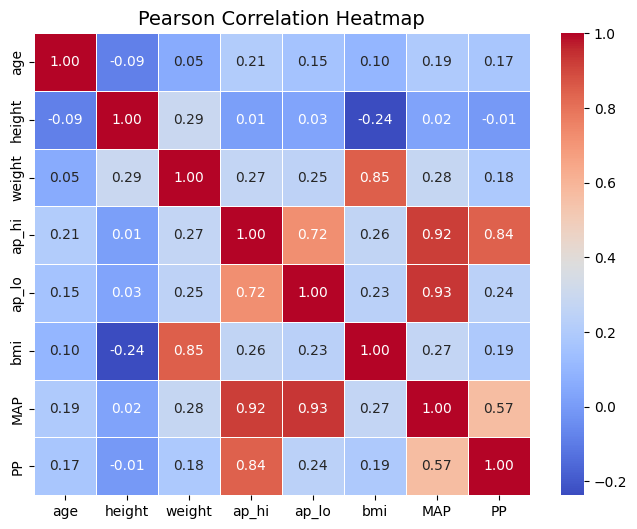

In [ ]:
# Calculate Point-Biserial Correlation
NumericalColumns=['age','height','weight','ap_hi','ap_lo','bmi','MAP','PP']
# Initialize an empty list to store results
correlation_results = []
for columnfeature in NumericalColumns:
  r_pb, p_value = pointbiserialr(Healthcare_Cleaned['cardio'], Healthcare_Cleaned[columnfeature])
  correlation_results.append({'Feature': columnfeature, 'Correlation (r_pb)': r_pb, 'P-value': p_value})

# Convert list to DataFrame
correlation_df = pd.DataFrame(correlation_results)
correlation_df=correlation_df.sort_values(by='Correlation (r_pb)',ascending=True)

# Display results
print(correlation_df)

# Compute Pearson correlation matrix
pearson_corr = Healthcare_Cleaned[NumericalColumns].corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title
plt.title("Pearson Correlation Heatmap", fontsize=14)

# Show plot
plt.show()

From Pi-serial correlation it is found that:
* weight and height features have a low correlation with the target column independently when we combine them in BMI feature it has higher correlation.


From the above observations:

there is high correlation between ap_hi & ap_lo which makes sense with the real life.

*  Real-life explanation:
In real life, systolic and diastolic blood pressures are two components of a person's overall blood pressure, and they are measured together. They're influenced by similar biological and lifestyle factors, which naturally causes them to rise and fall together.

There is high correlation between BMI and weight as BMI equation directlr depends on weight.

There is high correlation between MAP and (ap_lo & ap_hi) as the equation directly depends on ap_lo & ap_hi. the same for PP.

during machine learning phase it is required to chck if these columns are redundent features or not and affect the accuracy or not.



In [ ]:
from sklearn.feature_selection import mutual_info_classif

X = Healthcare_Cleaned[['age',	'gender',	'height',	'weight',	'ap_hi',	'ap_lo',	'cholesterol',	'gluc', 'smoke',	'alco',	'active',	'bmi',	'bmi_category',	'hypertension',	'MAP',	'PP','age_group']]
y = Healthcare_Cleaned['cardio']

mi_scores = mutual_info_classif(X, y,random_state=15)
# Create a DataFrame with feature names and their respective MI scores
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})

# Sort the DataFrame by MI Score in descending order for better visualization
mi_df = mi_df.sort_values(by='MI Score', ascending=False).reset_index(drop=True)

# Print the DataFrame
print(mi_df)

         Feature  MI Score
0          ap_hi  0.119272
1            MAP  0.113949
2   hypertension  0.097854
3             PP  0.079630
4          ap_lo  0.079126
5            age  0.031819
6      age_group  0.025818
7    cholesterol  0.024177
8            bmi  0.024040
9   bmi_category  0.018153
10        weight  0.016805
11          gluc  0.013416
12        gender  0.006271
13        active  0.004911
14         smoke  0.001003
15          alco  0.000483
16        height  0.000000


# **Check the balance of the data**

---



In [ ]:
# Create the interactive countplot
import plotly.express as px
import pandas as pd

# Create the interactive countplot
fig = px.histogram(
    Healthcare_Cleaned,
    x='cardio',
    color='cardio',
    color_discrete_sequence=px.colors.qualitative.Vivid,
    title='<b>Distribution of Cardio in Healthcare Data</b>',
    labels={'cardio': 'Cardio (0 = No, 1 = Yes)'}
)

# Calculate percentages
total = len(Healthcare_Cleaned)
percentages = [(count/total)*100 for count in Healthcare_Cleaned['cardio'].value_counts().sort_index()]

# Add percentage labels manually
fig.update_traces(
    text=[f'{p:.1f}%' for p in percentages],
    textposition='outside',
    hovertemplate="<b>Cardio %{x}</b><br>Count: %{y}<br>Percentage: %{text}",
    marker_line_width=1.5,
    marker_line_color='white'
)

# Customize layout
fig.update_layout(
    bargap=0.3,
    uniformtext_minsize=12,
    uniformtext_mode='hide',
    xaxis_title_font=dict(size=14),
    yaxis_title_font=dict(size=14),
    title_font=dict(size=18),
    showlegend=False,
    yaxis_title='Count'
)

fig.show()


In [ ]:
# Logistic Regression from scratch
class LogisticRegression:
    def __init__(self, learning_rate=0.1, n_iters=5000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.train_loss = []
        self.val_loss = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        m = len(y)
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        loss = -(1/m) * np.sum(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))
        return loss

    def fit(self, X, y, X_val, y_val):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Store loss for visualization
            self.train_loss.append(self.compute_loss(X, y))
            self.val_loss.append(self.compute_loss(X_val, y_val))

    def predict(self, X):
        return (self.sigmoid(np.dot(X, self.weights) + self.bias) >= 0.5).astype(int)



In [ ]:
X = Healthcare_Cleaned.drop(columns = ['cardio', 'age_bracket', 'id','height'], axis = 1)
y = Healthcare_Cleaned['cardio']

KeyError: "['age_bracket'] not found in axis"

In [ ]:
X

In [ ]:
#Filter on numerical columns before standardization
X_filtered=X[['age','weight','ap_hi','ap_lo','bmi','MAP','PP']]
X_filtered


In [ ]:
categorical_cols = X[['gender','cholesterol','gluc','smoke','alco','active','bmi_category','hypertension']]
categorical_cols

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)


In [ ]:
X_scaled

In [ ]:
# Convert scaled data to DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=X_filtered.columns)

# Plot histograms before and after scaling
fig, axes = plt.subplots(X_filtered.shape[1], 2, figsize=(15, 10))

for i, col in enumerate(X_filtered.columns):
    # Before scaling
    sns.histplot(X_filtered[col], ax=axes[i, 0], bins=30, kde=True)
    axes[i, 0].set_title(f"{col} (Before Scaling)")

    # After scaling
    sns.histplot(df_scaled[col], ax=axes[i, 1], bins=30, kde=True)
    axes[i, 1].set_title(f"{col} (After Scaling)")

plt.tight_layout()
plt.show()

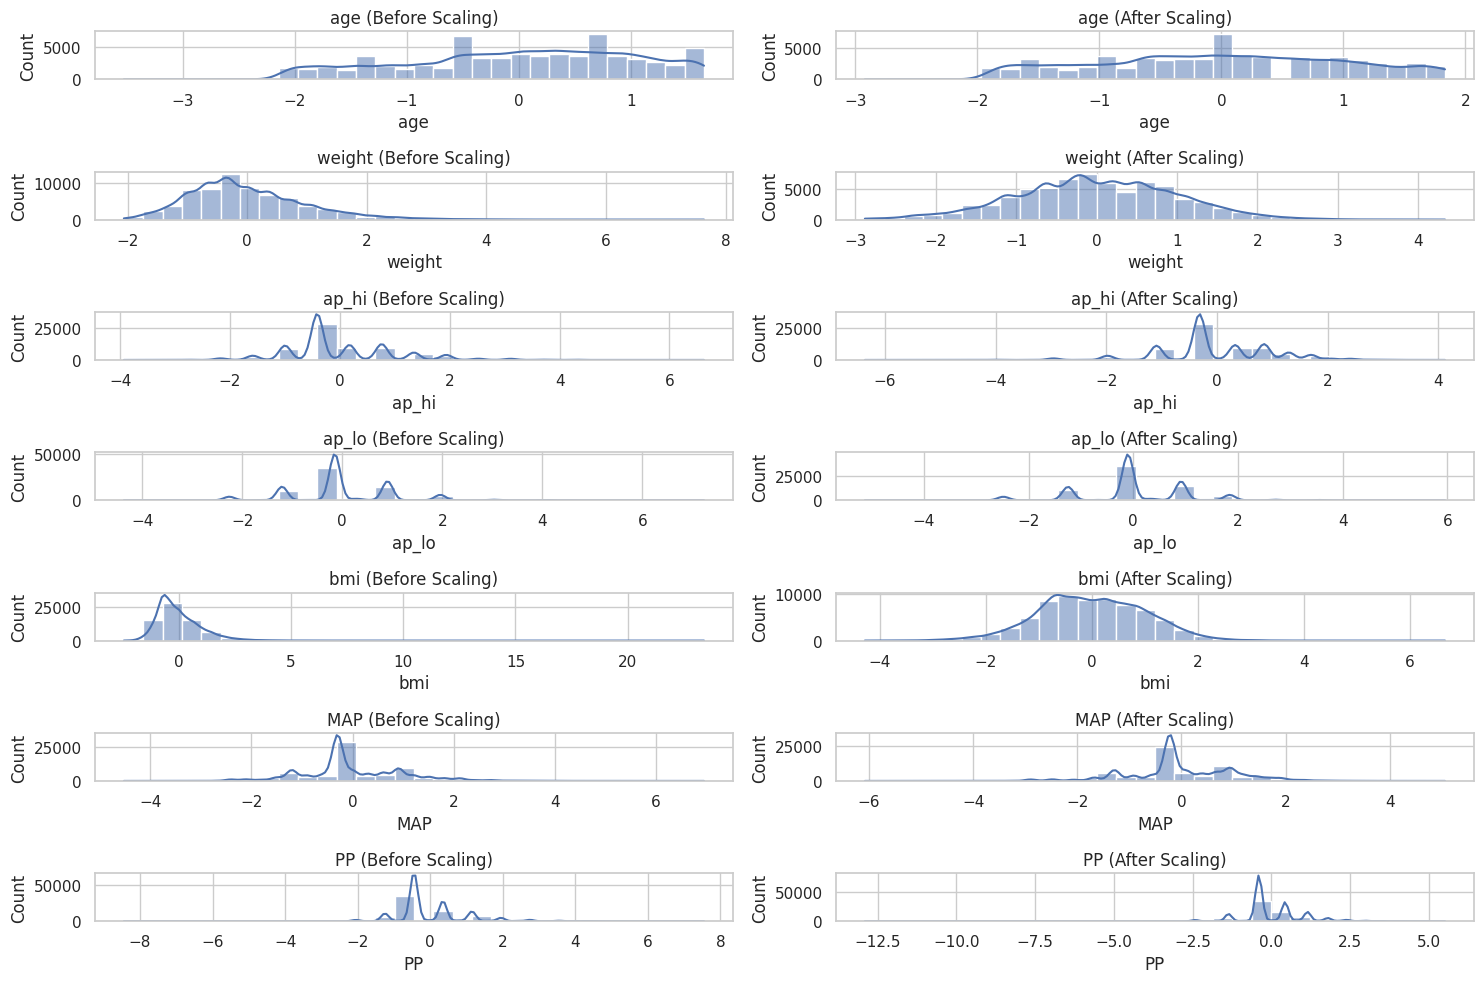

In [ ]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')  # Handles both positive & negative values
X_transformed = scaler.fit_transform(df_scaled)

df_transformed = pd.DataFrame(X_transformed, columns=df_scaled.columns)

# Plot histograms before and after scaling
fig, axes = plt.subplots(X_filtered.shape[1], 2, figsize=(15, 10))

for i, col in enumerate(X_filtered.columns):
    # Before scaling
    sns.histplot(df_scaled[col], ax=axes[i, 0], bins=30, kde=True)
    axes[i, 0].set_title(f"{col} (Before Scaling)")

    # After scaling
    sns.histplot(df_transformed[col], ax=axes[i, 1], bins=30, kde=True)
    axes[i, 1].set_title(f"{col} (After Scaling)")

plt.tight_layout()
plt.show()



In [ ]:
x_final= pd.concat([df_transformed, categorical_cols.reset_index(drop=True)], axis=1)
x_final

age    weight     ap_hi     ap_lo       bmi       MAP        PP  \
0     -0.496323 -0.920253 -1.093260 -0.101071 -1.294322 -0.561380 -1.364233   
1      0.243134  0.854483  0.849606  0.913855  1.347900  0.933082  0.431635   
2     -0.357687 -0.722213  0.328094 -1.246124 -0.806416 -0.561380  1.145549   
3     -0.763292  0.679452  1.298489  1.842138  0.452635  1.668418  0.431635   
4     -0.892380 -1.557889 -1.978130 -2.480928 -0.958354 -2.477896 -0.401092   
...         ...       ...       ...       ...       ...       ...       ...   
69249 -0.214950  0.289828 -0.316719 -0.101071  0.092910 -0.223127 -0.401092   
69250  1.273709  2.630583  0.849606  0.913855  2.719812  0.933082  0.431635   
69251 -0.214950  1.823577  2.409035  0.913855  0.882006  1.898807  2.964378   
69252  1.273709 -0.011074  0.600394 -0.101071  0.130902  0.245242  0.799235   
69253  0.405374 -0.011074 -0.316719 -0.101071 -0.404864 -0.223127 -0.401092   

       gender  cholesterol  gluc  smoke  alco  active  bmi_category  \
0           2            1     1      0     0       1             2   
1           1            3     1      0     0       1             4   
2           1            3     1      0     0       0             2   
3           2            1     1      0     0       1             3   
4           1            1     1      0     0       0             2   
...       ...          ...   ...    ...   ...     ...           ...   
69249       2            1     1      1     0       1             3   
69250       1            2     2      0     0       1             4   
69251       2            3     1      0     1       0             4   
69252       1            1     2      0     0       0             3   
69253       1            2     1      0     0       1             3   

       hypertension  
0                 0  
1                 1  
2                 0  
3                 1  
4                 0  
...             ...  
69249             0  
69250             1  
69251             1  
69252             1  
69253             0  

[69254 rows x 15 columns]

In [ ]:
# Step 1: Split into Train (70%) and Temporary Set (30%)
X_train, X_temp, y_train, y_temp = train_test_split(x_final, y, test_size=0.4, random_state=42)

# Step 2: Split Temporary Set into Validation (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
logreg = LogisticRegression(learning_rate = 0.001,  n_iters = 10000)

In [ ]:
logreg.fit(X_train, y_train, X_val, y_val)


<Figure size 1200x600 with 0 Axes>

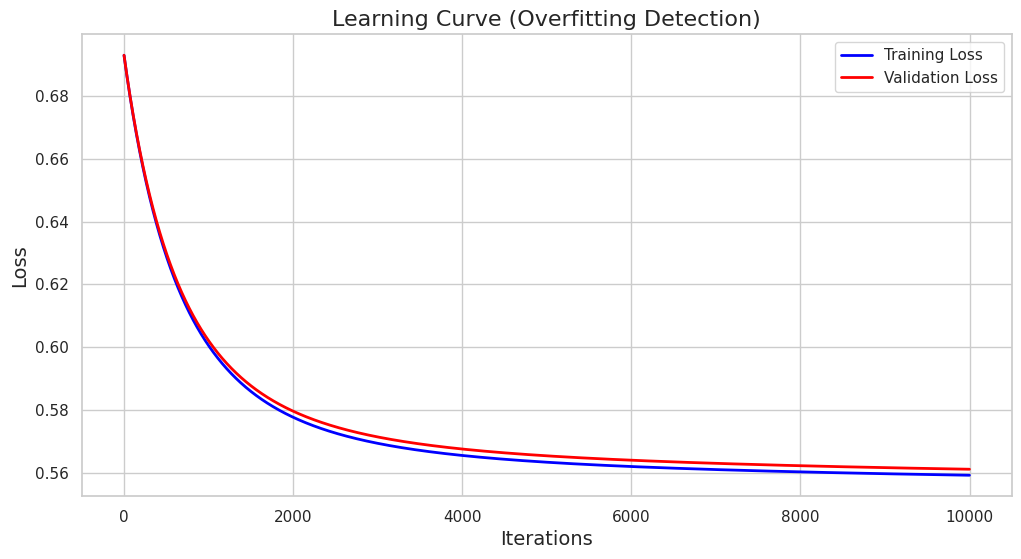

In [ ]:
# Plot learning curve
# Set figure size
plt.figure(figsize=(12, 6))  # Adjust to a reasonable size

start_idx = 0  # Start plotting from iteration 1000

plt.figure(figsize=(12, 6))  # Adjust size to be reasonable
plt.plot(range(start_idx, logreg.n_iters), logreg.train_loss[start_idx:], label="Training Loss", color="blue", linewidth=2)
plt.plot(range(start_idx, logreg.n_iters), logreg.val_loss[start_idx:], label="Validation Loss", color="red", linewidth=2)

plt.xlabel("Iterations", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.title("Learning Curve (Overfitting Detection)", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

**After drawing the loss function it seems that 3000 iteration is suitable**

In [ ]:
logreg = LogisticRegression(learning_rate = 0.001,  n_iters = 4500)
logreg.fit(X_train, y_train, X_val, y_val)

In [ ]:
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")  # Display as a percentage

Accuracy: 73.08%


In [ ]:
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score

# Initialize KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
validation_scores = []

for train_idx, test_idx in kfold.split(x_final):
    # Split into training and test set
    X_train_full, X_test = x_final.iloc[train_idx], x_final.iloc[test_idx]
    y_train_full, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Further split training set into actual training and validation set
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
    )

    # Initialize and train the model
    logreg = LogisticRegression(learning_rate=0.001, n_iters=1000)
    logreg.fit(X_train, y_train, X_val, y_val)
    # Make predictions
    y_val_pred = logreg.predict(X_val)  # Predictions on validation set
    y_test_pred = logreg.predict(X_test)  # Predictions on test set

    # Evaluate accuracy
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    validation_scores.append(val_accuracy)
    accuracy_scores.append(test_accuracy)

# Print results
print("Validation accuracy scores:", validation_scores)
print("Mean validation accuracy:", np.mean(validation_scores))

print("Cross-validation accuracy scores:", accuracy_scores)
print("Mean cross-validation accuracy:", np.mean(accuracy_scores))


Validation accuracy scores: [0.7233101705622236, 0.721776012995217, 0.7199711217399152, 0.7225882140601029, 0.7224979694973378]
Mean validation accuracy: 0.7220286977709593
Cross-validation accuracy scores: [0.7245686232041008, 0.7249296079705436, 0.7197314273337665, 0.7187928669410151, 0.7229602888086643]
Mean cross-validation accuracy: 0.722196562851618


In [ ]:
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Training set size: (44323, 15), Test set size: (13850, 15)


In [ ]:
!pip install xgboost

In [ ]:
# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
#pretrained logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#pretrained  Gradient Boosting
gbr = GradientBoostingClassifier()
gbr.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
#pretrained Extreme Gradient Boosting
xgr = XGBClassifier()
xgr.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#pretrained AdaBoostClassifier
adr = AdaBoostClassifier()
adr.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
svm = LinearSVC(random_state=42)
svm= CalibratedClassifierCV(svm)
svm.fit(X_train, y_train)
probabilities = svm.predict_proba(X_test)


In [ ]:
# Predictions
y_pred_rf = model.predict(X_test)
y_pred_gb = gbr.predict(X_test)
y_pred_xgb = xgr.predict(X_test)
y_pred_ad = adr.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_lr = logreg.predict(X_test)
y_pred_plr = log_reg.predict(X_test)


In [ ]:
print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_rf), 2) * 100, '%')
print("Gradient Boosting Accuracy:", round(accuracy_score(y_test, y_pred_gb), 2) * 100, '%')
print("XGBoost Accuracy:", round(accuracy_score(y_test, y_pred_xgb), 2) * 100, '%')
print("AdaBoost Accuracy:", round(accuracy_score(y_test, y_pred_ad), 2) * 100, '%')
print("SVM Accuracy:", round(accuracy_score(y_test, y_pred_svm), 2) * 100, '%')
print("Logistic Regression from scratch Accuracy:", round(accuracy_score(y_test, y_pred_lr), 2) * 100, '%')
print("Logistic Regression pretrained Accuracy:", round(accuracy_score(y_test, y_pred_lr), 2) * 100, '%')

Random Forest Accuracy: 71.0 %
Gradient Boosting Accuracy: 74.0 %
XGBoost Accuracy: 74.0 %
AdaBoost Accuracy: 73.0 %
SVM Accuracy: 73.0 %
Logistic Regression from scratch Accuracy: 72.0 %
Logistic Regression pretrained Accuracy: 72.0 %


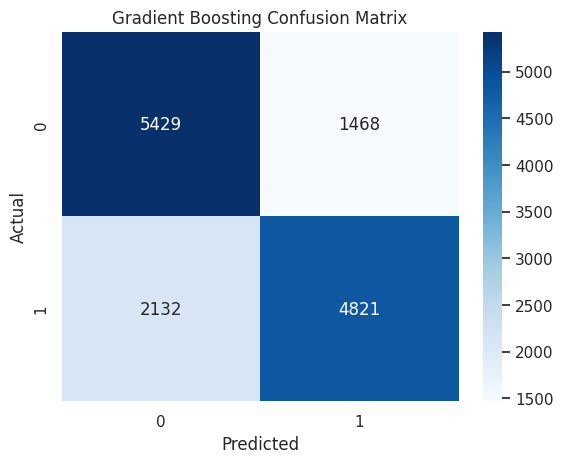

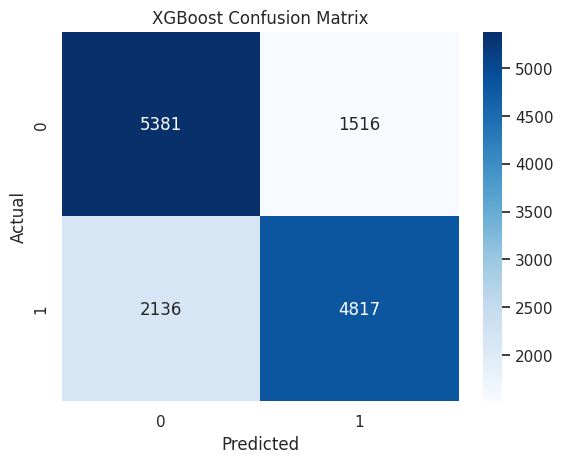

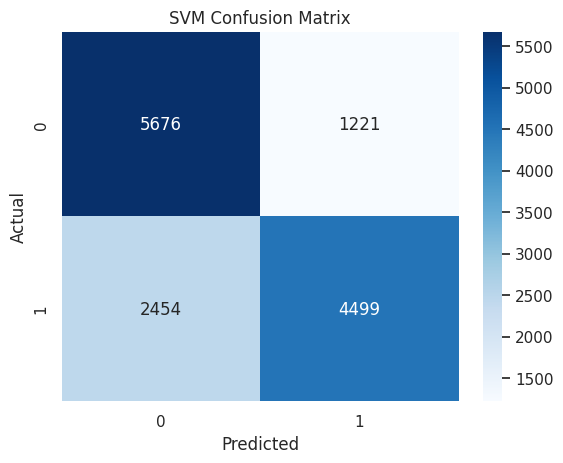

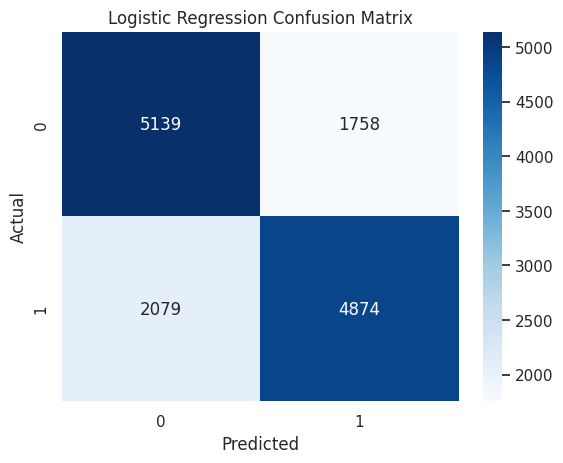

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_test, y_pred_gb, "Gradient Boosting Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_svm, "SVM Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression Confusion Matrix")

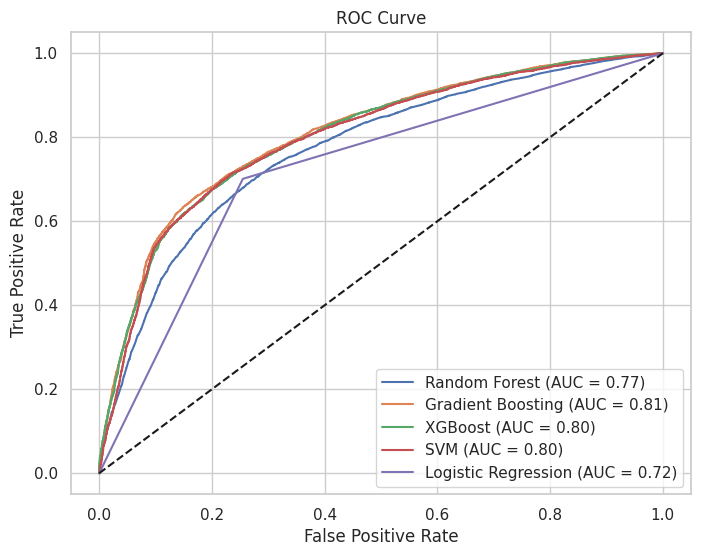

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(y_true, y_pred_proba, label):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    auc = roc_auc_score(y_true, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')

plt.figure(figsize=(8, 6))
plot_roc_curve(y_test, model.predict_proba(X_test)[:, 1], 'Random Forest')
plot_roc_curve(y_test, gbr.predict_proba(X_test)[:, 1], 'Gradient Boosting')
plot_roc_curve(y_test, xgr.predict_proba(X_test)[:, 1], 'XGBoost')
plot_roc_curve(y_test, svm.predict_proba(X_test)[:, 1], 'SVM')
plot_roc_curve(y_test, logreg.predict(X_test), 'Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

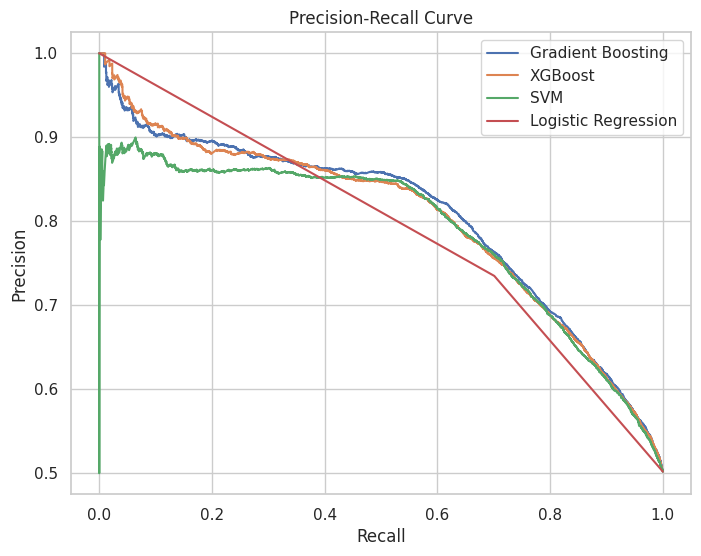

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
def plot_precision_recall_curve(y_true, y_pred_proba, label):
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
    plt.plot(recall, precision, label=label)

plt.figure(figsize=(8, 6))
plot_precision_recall_curve(y_test, gbr.predict_proba(X_test)[:, 1], 'Gradient Boosting')
plot_precision_recall_curve(y_test, xgr.predict_proba(X_test)[:, 1], 'XGBoost')
plot_precision_recall_curve(y_test, svm.predict_proba(X_test)[:, 1], 'SVM')
plot_precision_recall_curve(y_test, logreg.predict(X_test), 'Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()